In [1]:
import os
import datetime
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import urllib.parse
import matplotlib.pyplot as plt

load_dotenv()
POSTGRES_USERNAME = os.environ.get('JDB_USER')
POSTGRES_PASSWORD = os.environ.get('JDB_PASSWORD')
POSTGRES_ADDRESS = os.environ.get('JDB_HOST')
POSTGRES_PORT = 5432
POSTGRES_DBNAME = os.environ.get('JDB_NAME')
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)

In [2]:
now = datetime.datetime.now().strftime("%m-%d-%Y")
stays = pd.read_sql_query('select * from stays_summarized where end_date is null;', cnx)
stays 

,defendant_id,name,gender,race,start_date,end_date,days,max_level,is_pretrial,violent,dwi,drugs,not_primary_custodian,violation,use_flag
0,255848,"TERRERO, MIGUEL DE JESUS",M,W,2023-07-31,None,1.0,2,1,0,1,0,0,0,1
1,20991,"JONES, JALIA LOVE",F,B,2022-01-31,None,547.0,14,1,1,0,0,0,0,1
2,248430,"TIMPSON, ANTONIO DWIGHT",M,B,2023-07-13,None,19.0,6,1,1,0,1,0,0,1
3,8113,"MCCAUL, RANDALL SCOTT",M,W,2022-01-03,None,575.0,14,1,1,0,0,0,0,0
4,248405,"SODOSKI, LILLY MICHAELA",F,W,2023-07-13,None,19.0,6,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,202547,"DION, CALVIN TYLER",M,W,2023-03-28,None,126.0,12,1,1,0,0,0,0,1
398,171410,"LOPEZ, GABRIEL RODRIGUEZ",M,W,2023-01-05,None,208.0,9,1,1,0,0,0,0,1
399,174895,"JONES, KEITH PATRICK",M,W,2023-01-14,None,199.0,10,1,1,0,0,0,0,1
400,198318,"HAYNIE, AUSTIN DAKOTA",M,W,2023-03-17,None,137.0,13,1,1,0,0,0,1,1


In [3]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
#y['Percent'] = 100*x/464
y

,
Week or less,58
8-30 days,122
31-90 days,86
Over 90 days,135


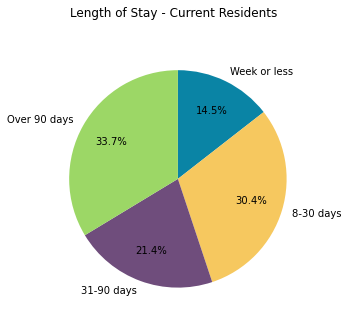

In [4]:
colors = ['#0a84a5', '#f6c85f', '#6f4d7c', '#9cd766', '#ca472f', '#ff9f56', '#8cddd0', ]

y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Length of Stay - Current Residents", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/all-current-residents-length-of-stay.png', bbox_inches='tight')

In [5]:
stays = pd.read_sql_query('select * from stays_summarized where end_date is null and is_pretrial = 1 and not_primary_custodian = 0;', cnx)
stays

,defendant_id,name,gender,race,start_date,end_date,days,max_level,is_pretrial,violent,dwi,drugs,not_primary_custodian,violation,use_flag
0,13274,"HUTCHISON, TEONNE TREVEZ",M,B,2022-01-15,None,554.0,0,1,0,0,0,0,0,1
1,9995,"WROTEN, RICHIE DION",M,B,2022-01-07,None,562.0,5,1,1,0,0,0,0,1
2,20991,"JONES, JALIA LOVE",F,B,2022-01-31,None,538.0,14,1,1,0,0,0,0,1
3,235701,"BOSEMAN, ROBERT LOUIS",M,B,2023-06-29,None,24.0,11,1,0,0,1,0,0,1
4,231584,"BURRELL, DAVID EDWARD",M,W,2023-06-19,None,34.0,6,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,252140,"SCIANNA, DAVID ALLEN",M,W,2023-07-22,None,1.0,5,1,0,0,1,0,0,1
301,252147,"SHAY, JOHN",M,W,2023-07-22,None,1.0,3,1,0,0,0,0,0,1
302,252164,"SMITH, MORGAN REED",M,W,2023-07-22,None,1.0,0,1,0,0,0,0,0,1
303,252210,"WARREN, ALYSA JORDAN",F,W,2023-07-22,None,1.0,11,1,0,0,0,0,0,1


In [6]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
y

,
Week or less,46
8-30 days,99
31-90 days,57
Over 90 days,103


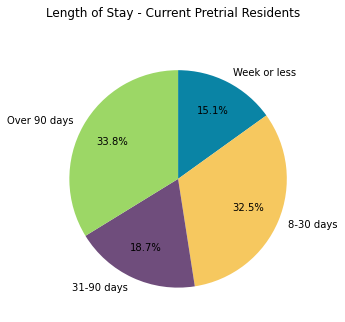

In [7]:
y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="Length of Stay - Current Pretrial Residents", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-current-residents-length-of-stay.png', bbox_inches='tight')

In [11]:
stays = pd.read_sql_query('select * from stays_summarized where is_pretrial = 1 and not_primary_custodian = 0;', cnx)
stays

,defendant_id,name,gender,race,start_date,end_date,days,max_level,is_pretrial,violent,dwi,drugs,not_primary_custodian,violation,use_flag
0,8750,"BRADY, TERRY REUBEN",M,W,2022-01-05,2022-01-05,1.0,6,1,1,0,0,0,0,1
1,8931,"LEE, MAKELA ELIZABETH",F,B,2022-01-05,2022-01-05,1.0,4,1,1,0,0,0,0,1
2,9044,"ROBINSON, PAUL CHESTER",M,W,2022-01-05,2022-01-05,1.0,5,1,0,0,1,0,0,1
3,9068,"SMILEY, BRANDY MICHELLE",F,W,2022-01-05,2022-01-06,2.0,3,1,0,0,1,0,0,1
4,8768,"BURWELL, DUSTIN LEE",M,W,2022-01-05,2022-01-08,4.0,5,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,251547,"GIBSON, TERRY ANTHONY SR",M,B,2023-07-21,2023-07-21,1.0,4,1,0,0,0,0,0,1
6601,251553,"GREENE, STEPHANIE RENEE",F,W,2023-07-21,2023-07-21,1.0,3,1,0,0,0,0,0,1
6602,250757,"HYATT, CHRISTOPHER JAMES",M,W,2023-07-19,2023-07-21,3.0,2,1,0,1,0,0,0,1
6603,251653,"MANLY, CHANCE A",M,W,2023-07-21,2023-07-21,1.0,3,1,0,0,0,0,0,1


In [12]:
tmp = [len(stays[stays['days'] <= 7]), 
       len(stays[(stays['days'] <= 30) & (stays['days'] > 7)]),
       len(stays[(stays['days'] <= 90) & (stays['days'] > 30)]),
       len(stays[stays['days'] > 90])]
x = pd.Series(tmp, name='', index=['Week or less', '8-30 days', '31-90 days', 'Over 90 days'])
y = pd.DataFrame(x)
y

,
Week or less,3773
8-30 days,1459
31-90 days,910
Over 90 days,463


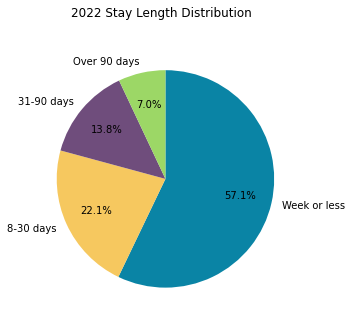

In [13]:
y.plot.pie(subplots=True, autopct='%1.1f%%',pctdistance=.7, 
           title="2022 Stay Length Distribution", legend=False, 
           figsize=[5,5], colors = colors,
           startangle=90, counterclock=False)
plt.savefig('/Users/ejaxon/development/jail/pretrial-2022-residents-length-of-stay.png', bbox_inches='tight')